In [118]:
import pandas as pd 
import numpy as np

In [119]:
environnement = pd.read_excel('../data/donnees_environnement_capteurs.xlsx')


colonnes = ['Capteurs',
            'Typologie_zone',
            'Type_voie','Nombre_voies',
            'Distance_capteur_voie',
            'Position_capteurs',
            'Presence_arbres',
            'Feuille_arbres',
            'Morphologie_urbaine',
            'Hauteur_batiments',
            'Distance_capteur_batiment',
            'Particularite',
            'Trafic_Routier_vehicule_leger',
            'Trafic_Routier_poids_lourds',
            'Trafic_Routier_2_roues',
            'emission_moyenne_annuelle_kg_maille_an',
            'Donnees_Cartographie']

# Changer les noms des colonnes
environnement.columns = colonnes

#Clean données transformation de la colonne trafic routier vehicule léger en flotant:
environnement['Trafic_Routier_vehicule_leger'] = environnement['Trafic_Routier_vehicule_leger'].astype(str).replace('\xa0', '').apply(lambda x: float(str(x).replace('\xa0', '')))

# transformation des données des colonnes 12 à 16 en flottant ( afin d'avoir une unicité de type des variables ) 
colonnes_a_convertir = environnement.columns[13:16]
environnement[colonnes_a_convertir] = environnement[colonnes_a_convertir].astype(float)

In [120]:
from sklearn.preprocessing import OrdinalEncoder

def encodage_ordinal_colonne(df, min, max):
    # Récupérer les colonnes entre 2 et 5
    colonnes_a_encoder = df.columns[min:max]
    
    # Créer un OrdinalEncoder
    ordinal_encoder = OrdinalEncoder()
    
    categories_ordonnees = ordinal_encoder.fit(df[colonnes_a_encoder]).categories_
    # Ajuster l'encodeur aux données et récupérer les catégories ordonnées
    df[colonnes_a_encoder] = ordinal_encoder.fit_transform(df[colonnes_a_encoder])

    #creation d'une matrice des categories pour aider à la compréhension 
    df_categories = pd.DataFrame(categories_ordonnees).T
    df_categories.columns = colonnes_a_encoder
    
    return df, df_categories

In [121]:
environnement_enc, mapping = encodage_ordinal_colonne(environnement, 1, 12)

In [122]:
environnement_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Capteurs                                97 non-null     object 
 1   Typologie_zone                          97 non-null     float64
 2   Type_voie                               97 non-null     float64
 3   Nombre_voies                            97 non-null     float64
 4   Distance_capteur_voie                   97 non-null     float64
 5   Position_capteurs                       97 non-null     float64
 6   Presence_arbres                         97 non-null     float64
 7   Feuille_arbres                          97 non-null     float64
 8   Morphologie_urbaine                     97 non-null     float64
 9   Hauteur_batiments                       97 non-null     float64
 10  Distance_capteur_batiment               97 non-null     float64


In [123]:
capteurs = environnement_enc['Capteurs']
environnement_enc = environnement_enc.drop(environnement_enc.columns[0], axis=1)

In [124]:
from sklearn.preprocessing import StandardScaler

##normalisation des données 

X = environnement_enc.to_numpy()
Y = StandardScaler().fit_transform(X)

environnement_normees = pd.DataFrame(Y)
environnement_normees.insert(0, "Capteurs", capteurs)
environnement_normees.columns = colonnes

environnement_normees

,Capteurs,Typologie_zone,Type_voie,Nombre_voies,Distance_capteur_voie,Position_capteurs,Presence_arbres,Feuille_arbres,Morphologie_urbaine,Hauteur_batiments,Distance_capteur_batiment,Particularite,Trafic_Routier_vehicule_leger,Trafic_Routier_poids_lourds,Trafic_Routier_2_roues,emission_moyenne_annuelle_kg_maille_an,Donnees_Cartographie
0,c1,-0.517024,0.430795,-1.320749,-1.290219,0.877568,0.808421,-0.094694,-0.40209,-0.239525,-0.958066,1.215253,1.086158,1.353421,1.105770,0.943359,1.209708
1,c2,-0.517024,0.430795,-1.320749,-1.290219,-0.573411,0.808421,-0.094694,-0.40209,-0.820374,0.388781,-1.688184,1.086158,1.353421,1.105770,0.943359,1.209708
2,c3,-0.517024,-1.934512,-1.320749,-1.290219,-2.508050,0.808421,-0.094694,-0.40209,-0.820374,-0.958066,-0.817153,1.086158,1.353421,1.105770,0.943359,0.299326
3,c4,-0.517024,-1.934512,-1.320749,-1.290219,-0.573411,0.808421,-0.094694,-0.40209,-0.820374,-0.958066,-1.107497,1.086158,1.353421,1.105770,0.943359,1.957521
4,c5,-0.517024,0.430795,-1.320749,-1.290219,0.877568,0.808421,-0.094694,-0.40209,-0.239525,-0.958066,1.215253,1.086158,1.353421,1.105770,0.943359,0.413124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,c93,0.958016,0.430795,-0.206726,0.830989,0.877568,0.808421,-0.094694,-0.40209,0.922172,-0.060168,-0.236465,-0.723478,-0.717663,-0.754825,0.528258,0.185529
93,c94,0.958016,0.430795,0.350286,-0.583150,-0.089751,0.808421,-0.094694,-0.40209,-1.982071,-0.060168,0.634566,-0.723478,-0.717663,-0.754825,0.528258,0.348097
94,c95,0.958016,1.219230,-0.206726,0.830989,0.877568,0.808421,1.742374,-0.40209,-0.239525,-0.958066,1.215253,-0.723478,-0.717663,-0.754825,-0.664124,-0.838650
95,c96,0.958016,0.430795,0.350286,0.830989,0.877568,0.808421,1.742374,-0.40209,-0.239525,-0.958066,-0.526809,0.186410,-0.689370,0.211407,-0.664124,-0.269662


In [126]:
environnement_normees.to_csv('../preprocessing/donnees_environnement_capteurs.csv', index=False, sep=';')
mapping.to_csv('../preprocessing/mapping_donnees_environnement_capteurs.csv', index=False, sep=';')

array([[<Axes: xlabel='Typologie_zone', ylabel='Typologie_zone'>,
        <Axes: xlabel='Type_voie', ylabel='Typologie_zone'>,
        <Axes: xlabel='Nombre_voies', ylabel='Typologie_zone'>,
        <Axes: xlabel='Distance_capteur_voie', ylabel='Typologie_zone'>,
        <Axes: xlabel='Position_capteurs', ylabel='Typologie_zone'>,
        <Axes: xlabel='Presence_arbres', ylabel='Typologie_zone'>,
        <Axes: xlabel='Feuille_arbres', ylabel='Typologie_zone'>,
        <Axes: xlabel='Morphologie_urbaine', ylabel='Typologie_zone'>,
        <Axes: xlabel='Hauteur_batiments', ylabel='Typologie_zone'>,
        <Axes: xlabel='Distance_capteur_batiment', ylabel='Typologie_zone'>,
        <Axes: xlabel='Particularite', ylabel='Typologie_zone'>,
        <Axes: xlabel='Trafic_Routier_vehicule_leger', ylabel='Typologie_zone'>,
        <Axes: xlabel='Trafic_Routier_poids_lourds', ylabel='Typologie_zone'>,
        <Axes: xlabel='Trafic_Routier_2_roues', ylabel='Typologie_zone'>,
        <Axes: xla

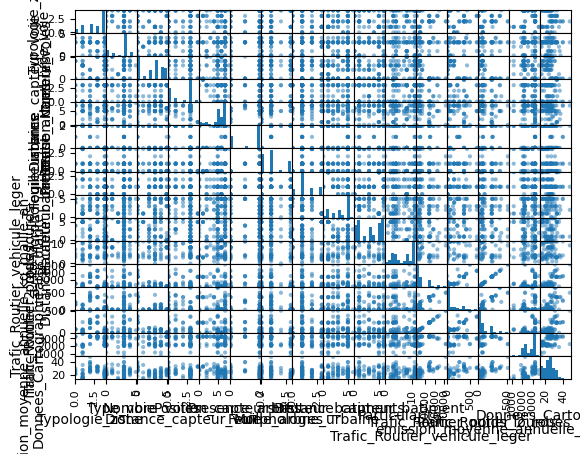

In [114]:
pd.plotting.scatter_matrix(environnement_enc)